In [1]:
from bpd.io import load_dataset
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
ds_plus1 = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_512_plus.npz")
ds_minus1 = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_512_minus.npz")
ds_errs1 = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp91_51/g_samples_513_errs.npz")

In [3]:
ds_plus2 = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp92_51/shear_samples_512_plus.npz")
ds_minus2 = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp92_51/shear_samples_512_minus.npz")
ds_errs2 = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp92_51/g_samples_513_errs_simple.npz")

In [4]:
ds_errs2['plus']['g1'].shape

(125, 2000)

In [32]:
ds_plus2['samples']['g1'].mean(), ds_minus2['samples']['g1'].mean(), ds_plus1['samples']['g1'].mean(), ds_minus1['samples']['g1'].mean()

(np.float64(0.018132925179361752),
 np.float64(-0.01911768560486621),
 np.float64(0.01822146799615467),
 np.float64(-0.019213360189559804))

# Sanity checks

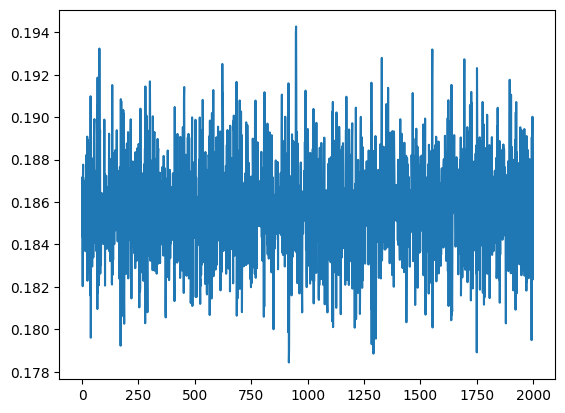

In [19]:
plt.plot(ds_errs2['plus']['sigma_e'][41])

(array([ 4., 10., 12., 24., 35., 18., 12.,  6.,  2.,  2.]),
 array([0.17857698, 0.179851  , 0.18112503, 0.18239905, 0.18367308,
        0.1849471 , 0.18622113, 0.18749515, 0.18876918, 0.19004321,
        0.19131723]),
 <BarContainer object of 10 artists>)

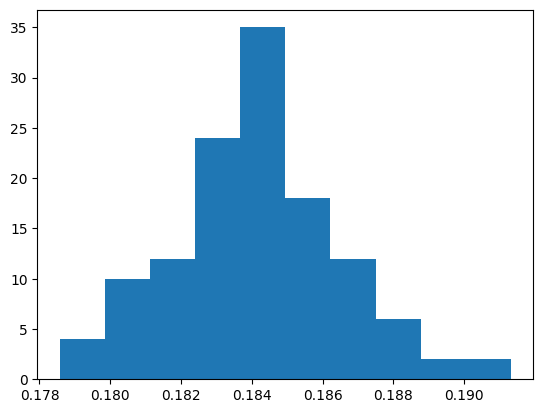

In [43]:
plt.hist(ds_errs2['plus']['sigma_e'].mean(1))

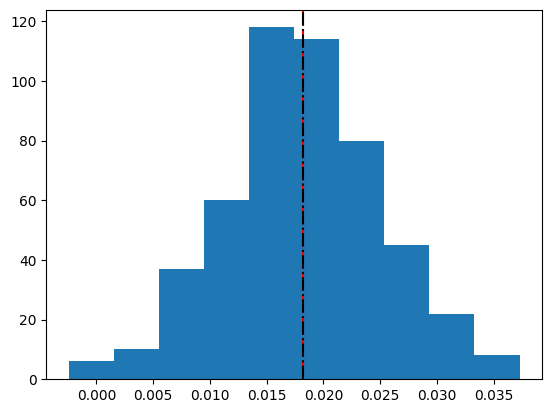

In [18]:
plt.hist(ds_errs1['plus']['g1'].mean(1))
plt.axvline(ds_plus1['samples']['g1'].mean(), c='r', ls='--')
plt.axvline(ds_errs1['plus']['g1'].mean(), c='k', ls='-.')

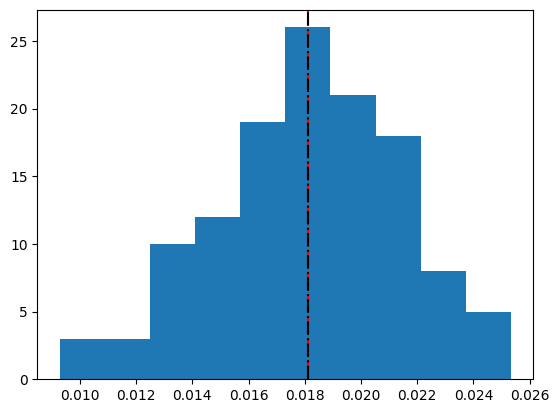

In [16]:
plt.hist(ds_errs2['plus']['g1'].mean(1))
plt.axvline(ds_plus2['samples']['g1'].mean(), c='r', ls='--')
plt.axvline(ds_errs2['plus']['g1'].mean(), c='k', ls='-.')

# Multiplicative bias 

In [20]:
def get_bias_results(dsp, dsm, ds_errs):
    g1p = dsp['samples']['g1']
    g2p = dsp['samples']['g2']
    
    g1m = dsm['samples']['g1']
    g2m = dsm['samples']['g2']

    m = (g1p.mean() - g1m.mean()) / 2/ 0.02 - 1
    c = (g2p.mean() + g2m.mean()) / 2


    g1ps = ds_errs['plus']['g1']
    g1ms = ds_errs['minus']['g1']
    g2ps = ds_errs['plus']['g2']
    g2ms = ds_errs['minus']['g2']
    n_subs = g1ps.shape[0]
    
    ms = (g1ps.mean(1) - g1ms.mean(1)) / 2 / 0.02 - 1 
    cs = (g2ps.mean(1) + g2ms.mean(1)) / 2

    out = m, c, ms.std() / np.sqrt(n_subs), cs.std() / np.sqrt(n_subs)

    return tuple(x.item() for x in out)


In [26]:
m, c, m_err, c_err = get_bias_results(ds_plus1, ds_minus1, ds_errs1)
print(f"m: {m/1e-3:.3f}, m_err: {m_err/1e-3:.3f} \nc: {c/1e-3:.3f}, c_err:{c_err/1e-3:.3f} \nUnits: 1e-3")

m: -64.129, m_err: 0.240 
c: 0.291, c_err:0.316 
Units: 1e-3


In [27]:
m, c, m_err, c_err = get_bias_results(ds_plus2, ds_minus2, ds_errs2)
print(f"m: {m/1e-3:.3f}, m_err: {m_err/1e-3:.3f} \nc: {c/1e-3:.3f}, c_err:{c_err/1e-3:.3f} \nUnits: 1e-3")

m: -68.735, m_err: 0.238 
c: 0.281, c_err:0.338 
Units: 1e-3


In [13]:
ds_plus1['samples'].keys()

dict_keys(['g1', 'g2'])